image histogram of  original


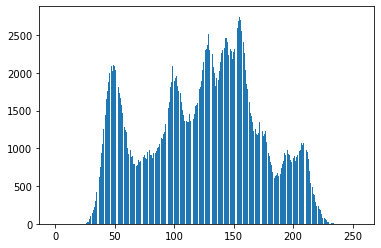

image intensity divided by 3


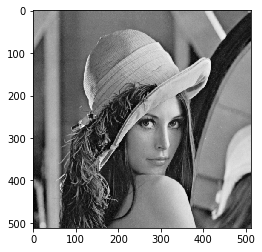

image histogram of  div_3


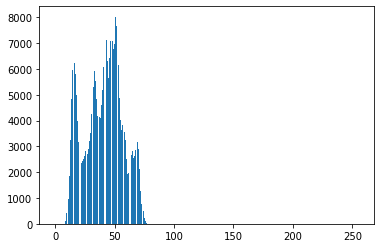

image after applying histogram eq


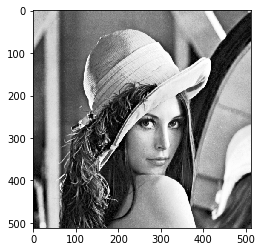

image histogram of  histogram_eq


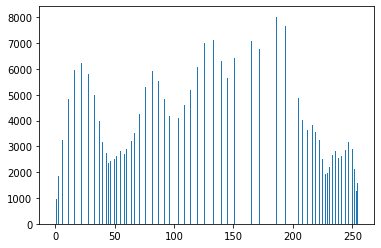

In [27]:
# NTU CSIE, Computer Vision HW3, R08922024, Alfons Hwu

import cv2
import math, sys
import matplotlib.pyplot as plt

####### hist ########
def img_hist(img_in, name):
    hist = [0 for i in range(256)]

    row, col  = img_in.shape
    for i in range(0, row):
        for j in range(0, col):
            hist[img_in[i, j]] += 1

    print('image histogram of ', name)
    plt.bar(range(0, 256), hist)
    plt.savefig('histogram_' + name)
    plt.show()
    return hist

####### div3 ########
def div3(img_in):
    return img_in // 3

### histogram_eq ####
def histogram_eq(img_in, hist):
    row, col  = img_in.shape
    cdf_list = [0 for i in range(256)]
    cdf = 0.0
    max_value = 0
    min_value = 1 << 31
    
    for i in range(0, len(hist)):
        if hist[i]:
            max_value = max(max_value, i)
            min_value = min(min_value, i)
            cdf += hist[i]
            cdf_list[i] = cdf
    
    for i in range(0, row):
        for j in range(0, col):
            img_in[i, j] =  int((cdf_list[img_in[i, j]] - cdf_list[min_value]) \
                            /(row * col - cdf_list[min_value]) \
                            * (256 - 1)) # 256 for grayscale
            
    return img_in

########## driver functions the first 2 problems ####
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

hist = img_hist(img, 'original')

img_div3 = div3(img)
print('image intensity divided by 3')
plt.clf()
plt.imshow(img_div3, cmap = 'gray')
plt.savefig('img_div3_plt.png', cmap = 'gray')
cv2.imwrite('img_div3_opencv.png', img_div3)
plt.show()

hist = img_hist(img_div3, 'div_3')

img_histogram_eq = histogram_eq(img_div3, hist)
print('image after applying histogram eq')
plt.clf()
plt.imshow(img_histogram_eq, cmap = 'gray')
plt.savefig('img_histogram_eq_plt.png', cmap = 'gray')
cv2.imwrite('img_histogram_eq_opencv.png', img_div3)
plt.show()

hist = img_hist(img_histogram_eq, 'histogram_eq')